In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('E:/kickstarter_projects.csv')

In [4]:
data

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live


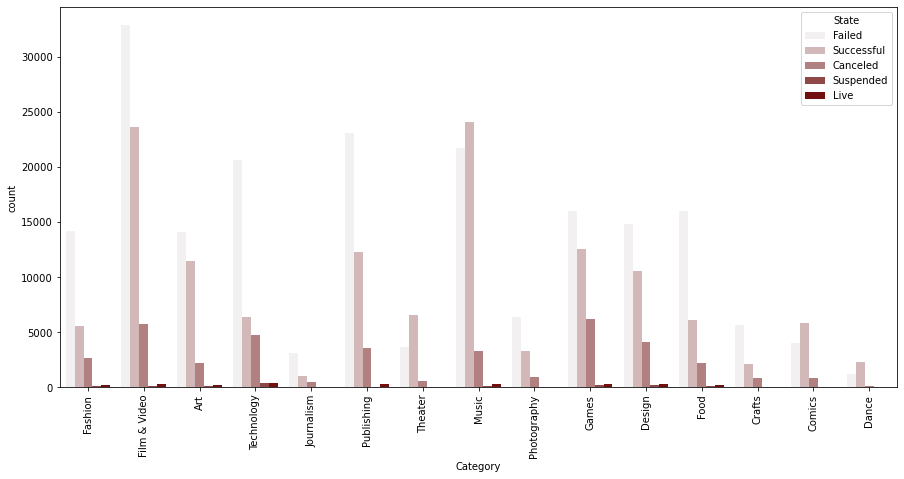

In [5]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'Category',data = data,hue = 'State',color = 'maroon')
plt.xticks(rotation = 'vertical')
plt.show()

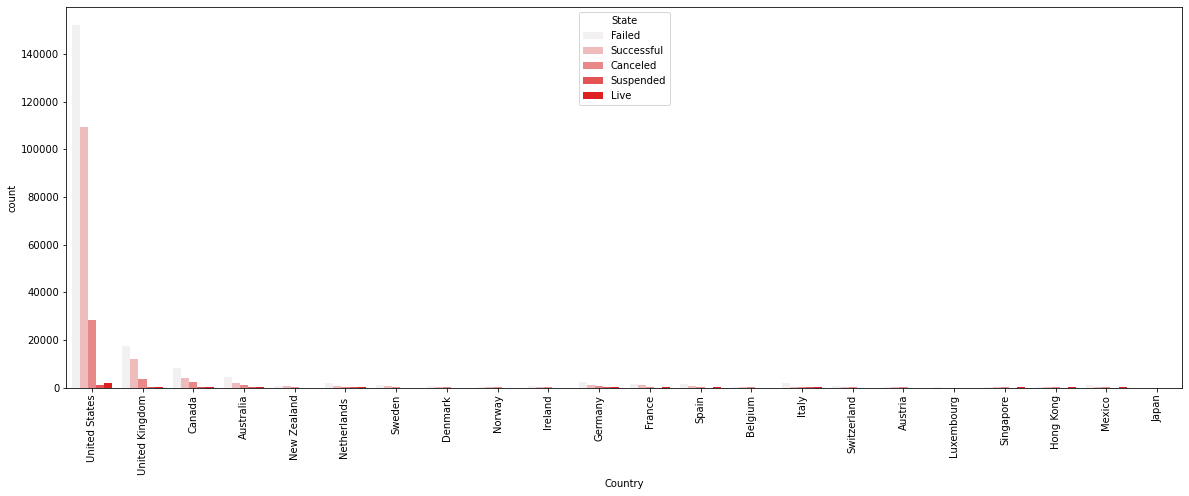

In [6]:
plt.figure(figsize = (20,7))
sns.countplot(x = 'Country',data = data,hue = 'State',color = 'red')
plt.xticks(rotation = 'vertical')
plt.show()

In [7]:
a = data[['Goal','Pledged','Backers']].corr()

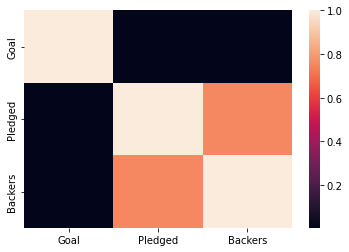

In [8]:
sns.heatmap(a)
plt.show()

In [9]:
# preparing for the model
# taking only those data that are either failed or succeded. 
model_data = data[data.State.isin(['Failed','Successful'])]

In [10]:
# removing the colums that are not required in to the model preparation
model_data.drop(['ID','Name','Launched','Deadline'],axis = 1,inplace = True)

C:\Users\ABCD\AppData\Local\Temp\ipykernel_8500\80055376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.drop(['ID','Name','Launched','Deadline'],axis = 1,inplace = True)


In [11]:
model_data

,Category,Subcategory,Country,Goal,Pledged,Backers,State
0,Fashion,Fashion,United States,1000,625,30,Failed
1,Film & Video,Shorts,United States,80000,22,3,Failed
2,Art,Illustration,United States,20,35,3,Successful
3,Technology,Software,United States,99,145,25,Successful
4,Fashion,Fashion,United States,1900,387,10,Failed
...,...,...,...,...,...,...,...
374310,Games,Games,Austria,36,270,36,Successful
374400,Games,Tabletop Games,United Kingdom,271,545,25,Successful
374458,Fashion,Apparel,United States,200,202,6,Successful
374530,Games,Tabletop Games,United States,250,265,7,Successful


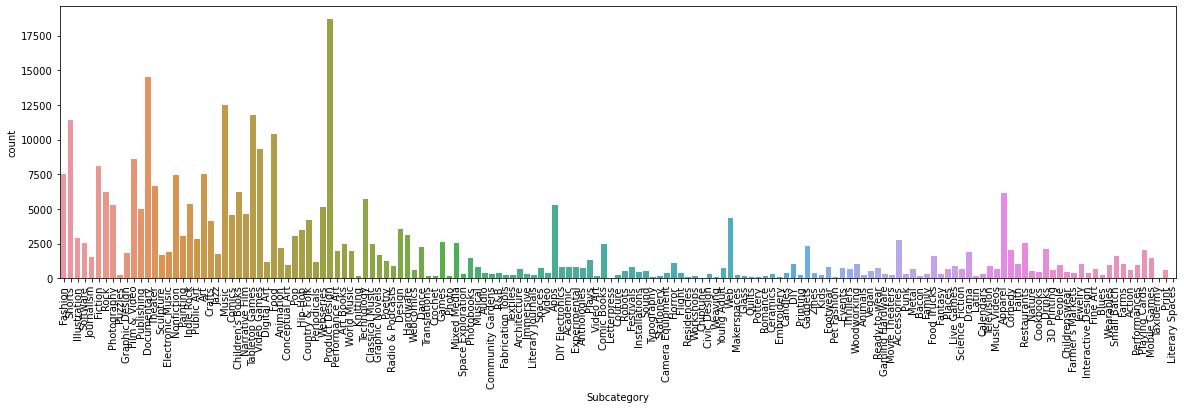

In [12]:
plt.figure(figsize = (20,5))
sns.countplot(x = 'Subcategory',data = model_data)
plt.xticks(rotation = 'vertical')
plt.show()

In [13]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [14]:
transformer = ColumnTransformer(
    transformers = [('tnf1',OrdinalEncoder(),['Category','Subcategory','Country','State']),
                    ('tnf2',MinMaxScaler(),['Goal','Pledged','Backers'])],remainder = 'passthrough')

In [15]:
p_data = transformer.fit_transform(model_data)

In [16]:
new = pd.DataFrame(p_data,columns =['Category','Subcategory','Country','State','Goal','Pledged','Backers'])

# preparing data for training purpose

In [17]:
from sklearn.model_selection import train_test_split
y = new['State'].to_numpy()
x = new[['Category','Subcategory','Country','Goal','Pledged','Backers']].to_numpy()
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1,test_size = 0.3)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.model_selection import GridSearchCV

In [19]:
lr = LogisticRegression(penalty = 'none',max_iter = 200,solver = 'newton-cg')

In [20]:
lr.fit(x_train,y_train)

C:\Users\ABCD\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ABCD\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ABCD\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ABCD\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ABCD\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  

LogisticRegression(max_iter=200, penalty='none', solver='newton-cg')

In [21]:
lrpred = lr.predict(x_train)

In [22]:
precision_score(y_train,lrpred)

0.984525338442428

In [23]:
recall_score(y_train,lrpred)

0.9965688468341751

In [24]:
lr.score(x_train,y_train)

0.9922766277481112

In [25]:
lr.score(x_test,y_test)

0.9927191544565009

# decision tree

In [161]:
dt = DecisionTreeClassifier()

In [162]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [167]:
dtpred = dt.predict(x_train)
dtpred

array([0., 0., 1., ..., 0., 1., 0.])

In [165]:
dt.score(x_test,y_test)

0.9976769677892979

In [168]:
precision_score(y_train,dtpred)

0.9999680289870517

In [169]:
recall_score(y_train,dtpred)

0.9998508194275728